<a href="https://colab.research.google.com/github/Javad1942/Group-2-QBC8/blob/Classification%2FMojtaba-Diana/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas==1.5.3
!pip install scikit-learn==1.5.2
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 82.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing inst

In [ ]:
import xgboost as xgb
import pandas as pd
import sklearn

print("XGBoost version:", xgb.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.3
Pandas version: 1.5.3
Scikit-learn version: 1.5.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
%cd /content/drive/My Drive/bootcamp_project

/content/drive/.shortcut-targets-by-id/1XGS6I_vI23LBKkFLHiNCIiAQUVOr_p2k/bootcamp_project


In [ ]:
!ls

 classification-step1				      HBN.csv
 complete.ipynb					      hbn_dataset.csv
'data_dictionary (2).csv'			      hbn_dataset_final.csv
 dataset_for_model.csv				      HBN.ipynb
 dataset_mohammad.csv				      HBN_second
 df_HBN_0.csv					      khoroji2.csv
 df_HBN_clean.ipynb				      khoroji.csv
 feature.ipynb					     'model_(1)_(1) (1).ipynb'
 final1-data.csv				     'model_(1) (1).ipynb'
 final-HBN.ipynb				      model.ipynb
 final_HBN_MOhammad.csv				      series_parquet
 HBN_and_parquet_feature_extraction_selection.ipynb   series.parquet.zip


In [ ]:
data = pd.read_csv('dataset_for_model.csv')

In [ ]:
y = data['sii']
x = data.drop(columns=['sii'])

#▶ Create Model

In [ ]:
# تقسیم به Train و Test (85% Train, 15% Test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42, stratify=y)

# تقسیم Train به Train و Validation (80% Train, 20% Validation از داده‌های Train)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


##◀ RandomForest


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

#➡ GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [20,30,50],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 3, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 50}


#➡ Train

In [ ]:
y_train_pred = best_model.predict(x_train)

y_train_proba = best_model.predict_proba(x_train)

print(classification_report(y_train, y_train_pred))

roc_auc = roc_auc_score(y_train, y_train_proba, multi_class='ovr')
print("Train ROC AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       396
         1.0       1.00      1.00      1.00       397
         2.0       1.00      1.00      1.00       396
         3.0       1.00      1.00      1.00       396

    accuracy                           1.00      1585
   macro avg       1.00      1.00      1.00      1585
weighted avg       1.00      1.00      1.00      1585

Train ROC AUC: 1.0


#➡ Validation

In [ ]:
y_val_pred = best_model.predict(x_val)

y_val_proba = best_model.predict_proba(x_val)

print(classification_report(y_val, y_val_pred))

roc_auc = roc_auc_score(y_val, y_val_proba, multi_class='ovr')
print("Validation ROC AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        99
         1.0       0.83      0.76      0.79        99
         2.0       0.90      0.98      0.94        99
         3.0       1.00      1.00      1.00       100

    accuracy                           0.89       397
   macro avg       0.89      0.89      0.89       397
weighted avg       0.89      0.89      0.89       397

Validation ROC AUC: 0.9796920547759473


#➡ Test

In [ ]:
y_test_pred = best_model.predict(x_test)
y_test_proba = best_model.predict_proba(x_test)

print(classification_report(y_test, y_test_pred))

roc_auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr")
print("Test ROC AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        88
         1.0       0.90      0.70      0.79        87
         2.0       0.87      0.99      0.93        88
         3.0       1.00      1.00      1.00        87

    accuracy                           0.90       350
   macro avg       0.90      0.90      0.90       350
weighted avg       0.90      0.90      0.90       350

Test ROC AUC: 0.9856207192318335


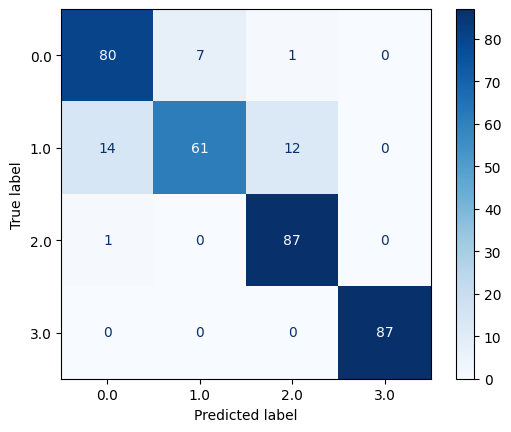

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

##◀ XGBoost

In [ ]:
# تعریف مدل
model_xgb = XGBClassifier(enable_categorical=False,eval_metric='mlogloss',use_label_encoder=False, random_state=42,tree_method='auto',gpu_id=-1)
model_xgb.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:35:25] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:35:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=-1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

#➡ GridSearchCV

In [ ]:
param_grid_xgb = {
    'n_estimators': [150,200,250],
    'max_depth': [3,5,7],
    'learning_rate': [0.1,0.2,0.3]
}

grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=3, n_jobs=-1, verbose=2,scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

print("Best parameters found: ", grid_search_xgb.best_params_)
best_model_xgb = grid_search_xgb.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:37:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}


#➡ Train

In [ ]:
y_train_pred = best_model_xgb.predict(x_train)

y_train_proba = best_model_xgb.predict_proba(x_train)

print(classification_report(y_train, y_train_pred))

roc_auc = roc_auc_score(y_train, y_train_proba, multi_class='ovr')
print("Train ROC AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       396
         1.0       1.00      1.00      1.00       397
         2.0       1.00      1.00      1.00       396
         3.0       1.00      1.00      1.00       396

    accuracy                           1.00      1585
   macro avg       1.00      1.00      1.00      1585
weighted avg       1.00      1.00      1.00      1585

Train ROC AUC: 1.0


#➡ Validation

In [ ]:
y_val_pred = best_model_xgb.predict(x_val)

y_val_proba = best_model_xgb.predict_proba(x_val)

print(classification_report(y_val, y_val_pred))

roc_auc = roc_auc_score(y_val, y_val_proba, multi_class='ovr')
print("Validation ROC AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        99
         1.0       0.84      0.76      0.80        99
         2.0       0.89      0.98      0.93        99
         3.0       1.00      1.00      1.00       100

    accuracy                           0.89       397
   macro avg       0.89      0.89      0.89       397
weighted avg       0.89      0.89      0.89       397

Validation ROC AUC: 0.9818147922174768


#➡ Test

In [ ]:
y_test_pred = best_model_xgb.predict(x_test)
y_test_proba = best_model_xgb.predict_proba(x_test)

print(classification_report(y_test, y_test_pred))

roc_auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr")
print("Test ROC AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86        88
         1.0       0.87      0.76      0.81        87
         2.0       0.87      0.94      0.91        88
         3.0       0.99      1.00      0.99        87

    accuracy                           0.89       350
   macro avg       0.89      0.89      0.89       350
weighted avg       0.89      0.89      0.89       350

Test ROC AUC: 0.9872421353226319


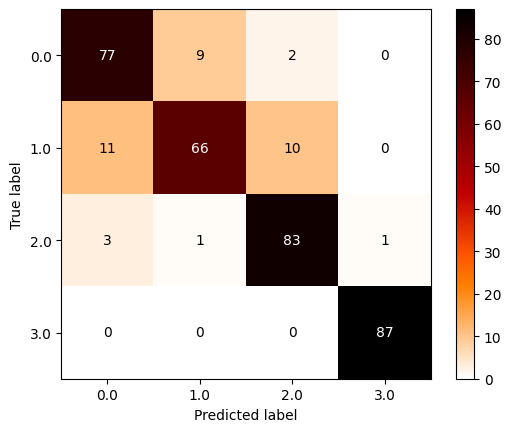

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gist_heat_r')
plt.show()

##ANN

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model_mlp = MLPClassifier(max_iter=1000, random_state=42)
model_mlp.fit(x_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=42)

#➡ GridSearchCV

In [ ]:
param_grid_mlp = {
    'hidden_layer_sizes': [128,256,512],
    'activation': ['relu', 'softmax'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
grid_search_mlp = GridSearchCV(model_mlp, param_grid_mlp, cv=3, n_jobs=-1, verbose=2,scoring='accuracy')

grid_search_mlp.fit(x_train_scaled, y_train)

print("Best parameters found: ", grid_search_mlp.best_params_)
best_model_mlp = grid_search_mlp.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
162 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best parameters found:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 256, 'learning_rate_init': 0.001, 'solver': 'adam'}


#➡ Train

In [ ]:
y_train_pred = best_model_mlp.predict(x_train_scaled)

y_train_proba = best_model_mlp.predict_proba(x_train_scaled)

print(classification_report(y_train, y_train_pred))

roc_auc = roc_auc_score(y_train, y_train_proba, multi_class='ovr')
print("Train ROC AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       396
         1.0       1.00      1.00      1.00       397
         2.0       1.00      1.00      1.00       396
         3.0       1.00      1.00      1.00       396

    accuracy                           1.00      1585
   macro avg       1.00      1.00      1.00      1585
weighted avg       1.00      1.00      1.00      1585

Train ROC AUC: 1.0


#➡ Validation

In [ ]:
y_val_pred = best_model_mlp.predict(x_val_scaled)

y_val_proba = best_model_mlp.predict_proba(x_val_scaled)

print(classification_report(y_val, y_val_pred))

roc_auc = roc_auc_score(y_val, y_val_proba, multi_class='ovr')
print("Validation ROC AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88        99
         1.0       0.87      0.83      0.85        99
         2.0       0.90      0.97      0.93        99
         3.0       1.00      1.00      1.00       100

    accuracy                           0.92       397
   macro avg       0.92      0.92      0.92       397
weighted avg       0.92      0.92      0.92       397

Validation ROC AUC: 0.9806623279777642


#➡ Test

In [ ]:
y_test_pred = best_model_mlp.predict(x_test_scaled)
y_test_proba = best_model_mlp.predict_proba(x_test_scaled)

print(classification_report(y_test, y_test_pred))

roc_auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr")
print("Test ROC AUC:", roc_auc)

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        88
         1.0       0.91      0.77      0.83        87
         2.0       0.86      0.99      0.92        88
         3.0       1.00      1.00      1.00        87

    accuracy                           0.91       350
   macro avg       0.91      0.91      0.91       350
weighted avg       0.91      0.91      0.91       350

Test ROC AUC: 0.9820242923620357


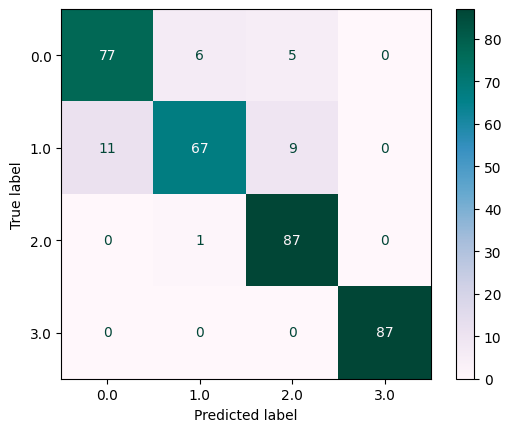

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='PuBuGn')
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  MLPClassifier در داده‌های اعتبارسنجی عملکرد بهتری نسبت به دو مدل دیگر دارد (دقت 92% مقابل 89% در اعتبارسنجی). این مدل در داده‌های تست هم عملکرد عالی با دقت 91% دارد و ROC AUC مشابهی با XGBoost نشان می‌دهد.
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  اگر ROC AUC و عملکرد در داده‌های تست مد نظر باشد، XGBoost به دلیل ROC AUC بالاتر در داده‌های تست ممکن است گزینه بهتری باشد.
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
✅  در کل، همه‌ی مدل‌ها عملکرد عالی دارند ، ولی از نظر کلی گر دقت و عملکرد کلی مد نظر باشد، MLPClassifier بهترین انتخاب است.
</p>